### Shopee Analytics

****

**Yêu cầu**
* Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.
* Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.
* Vẽ biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.
* Vẽ biểu đồ thể hiện xu hướng của số lượng shop gia nhập theo thời gian.
* Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import numpy as np

In [2]:
df = pd.read_csv('../Data/shopeep_koreantop_clothing_shop_data.csv')

In [3]:
df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
736,20210706325618926,2021-07-06,325618926,Be Young Life,October,21,2020,120,14578,09:40:53,93,NaN,29,2830,93,4.85,1,0
737,20210706416886409,2021-07-06,416886409,vaapo.ph,April,4,2021,620,228,09:44:25,94,NaN,0,36,1,4.89,1,0
738,20210706419954100,2021-07-06,419954100,Fall in love with you,April,9,2021,662,12968,09:33:28,59,NaN,21,1092,63,4.75,0,0
739,2021070664360491,2021-07-06,64360491,Yzkzks.ph,April,9,2018,650,80591,10:41:36,92,"Pasay City,Metro Manila",385,55669,1161,4.89,0,0
740,2021070616590993,2021-07-06,16590993,Adol Janet,February,14,2017,473,513469,12:55:27,78,"Binondo,Metro Manila",2506,297528,9597,4.84,0,0
741,20210706449182992,2021-07-06,449182992,Yacent_thrift_Clo,May,22,2021,16,115,08:45:30,86,"Legazpi City,Albay",0,32,0,5.00,0,0
742,20210706396605392,2021-07-06,396605392,Akistore.ph,March,3,2021,84,84,08:01:23,91,NaN,1,9,0,4.60,0,0
743,20210706360379308,2021-07-06,360379308,Yzanice Shop,December,20,2020,78,5982,08:46:30,96,NaN,16,463,16,4.75,1,0
744,2021070629392066,2021-07-06,29392066,Clairecvc Shop,August,2,2017,964,44029,12:19:44,73,"Binondo,Metro Manila",1960,103289,3982,4.78,0,0
745,2021070625811092,2021-07-06,25811092,angelcity.💋,June,17,2017,272,868370,10:02:42,36,"Pasay City,Metro Manila",13401,708666,30799,4.77,0,0


In [4]:
def linear_reg(p1, p2, p3): # Hàm tính các hệ số Linear Regression
    lg = [0,0]
    lg[0], lg[1] = np.polyfit(p3[p1], p3[p2], deg=1)
    return lg

def o_c(str1, str2, str3): # Hàm dọn các giá trị ngoại biên bằng hệ số Z-Scores (outliners cleaner), đối chiếu 2.1.8
    df_1 = str3.dropna(subset=[str1,str2])
    df_2 = df_1[[str1,str2]]
    z = np.abs(stats.zscore(df_2))
    return df_2[(z<0.3).all(axis=1)]

Text(0, 0.5, 'Number of Shops')

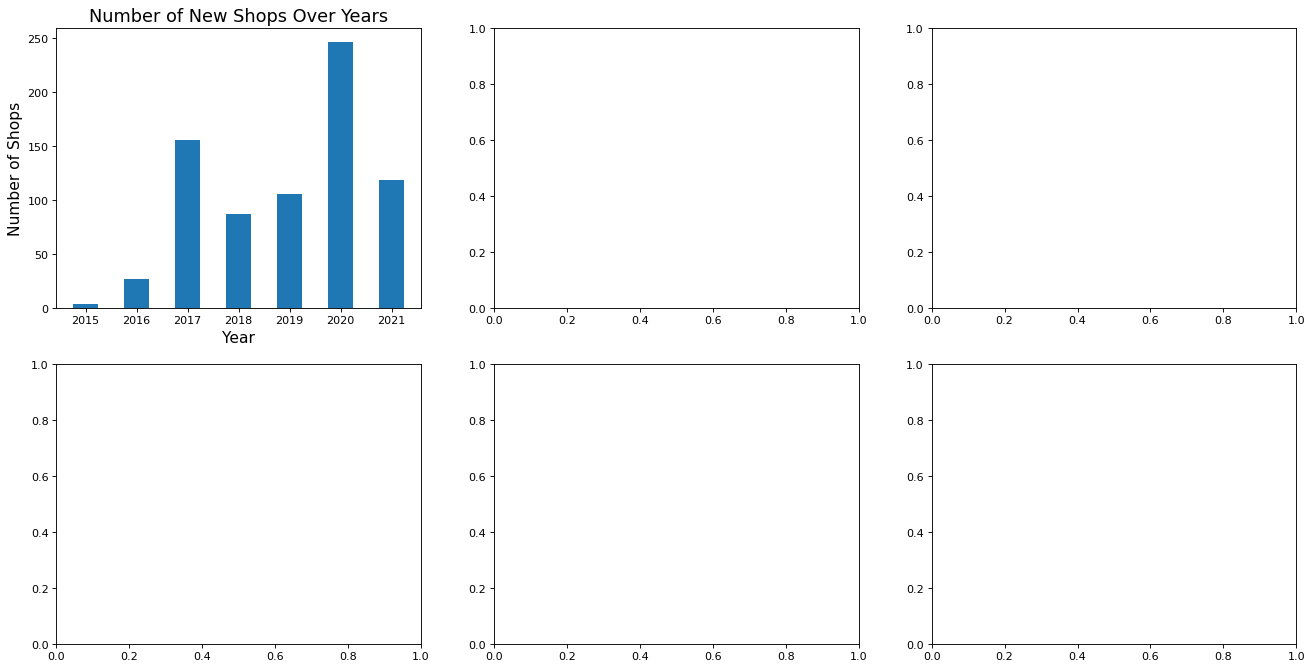

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(20,10), dpi=80) # Cài đặt Figure với các Axes

# Yêu cầu 1
count_shop = df.groupby(['join_year'])[['join_year']].count()
axs[0,0].bar(count_shop.index, count_shop.join_year, width=0.5)
# Tắt tự hiện biểu đồ khi không sử dụng plt.show
axs[0,0].set_title('Number of New Shops Over Years', fontsize=16)
axs[0,0].set_xlabel('Year', fontsize=14)
axs[0,0].set_ylabel('Number of Shops', fontsize=14)


In [6]:
# Yêu cầu 2
%matplotlib inline
df_sub = o_c('response_rate','rating_good', df)
colors = np.random.randint(10, 20, size=df_sub.shape[0])
axs[0,1].scatter(df_sub['response_rate'], df_sub['rating_good'], c=colors)
axs[0,1].set_title('Response rate with Rating good', fontsize=16)
axs[0,1].set_xlabel('Response rate', fontsize=14)
axs[0,1].set_ylabel('Rating good', fontsize=14)
a1 = linear_reg('response_rate', 'rating_good', df_sub)
axs[0,1].plot(df_sub.response_rate, a1[0]*df_sub.response_rate+a1[1], color='r')

In [7]:
# Yêu cầu 3
# Cần đổi định dạng thời gian về giây (seconds)
%matplotlib inline
df_sub = df.loc[:]
df_sub['response_time'] = [e.strip() for e in df.response_time]
df_sub['response_time'] = pd.to_datetime(df_sub['response_time'], format='%H:%M:%S').dt.time
df_sub['response_time'] = [(int(e.strftime('%H'))*int(e.strftime('%M'))*60+int(e.strftime('%S'))) for e in df_sub.response_time]
df_sub2 = o_c('response_time','rating_bad',df_sub)

colors = np.random.randint(10, 20, size=df_sub2.shape[0])
axs[0,2].scatter(df_sub2['response_time'], df_sub2['rating_bad'], c=colors)
axs[0,2].set_title('Response time with Rating bad', fontsize=16)
axs[0,2].set_xlabel('Response time (seconds)', fontsize=14)
axs[0,2].set_ylabel('Rating bad', fontsize=14)
a1 = linear_reg('response_time', 'rating_bad', df_sub2)
axs[0,2].plot(df_sub2.response_time, a1[0]*df_sub2.response_time+a1[1], color='r')

[Convert Full name Month to Month and Full Time](https://www.geeksforgeeks.org/python-datetime-strptime-function/)\
[String to DateTime object](https://www.programiz.com/python-programming/datetime/strptime#google_vignette)

In [8]:
# Yêu cầu 4
from datetime import datetime
%matplotlib inline
year = df_sub['join_year']
month = df_sub['join_month']
day = df_sub['join_day']
combin = ['{} {} {}'.format(year[i], month[i], day[i]) for i in range(len(df_sub.index))]
df['join_time'] = combin

df_sub = df.loc[:]
df_sub['join_time'] = [datetime.strptime(e, '%Y %B %d') for e in df_sub['join_time']] 
# Tham khảo: https://www.programiz.com/python-programming/datetime/strptime#google_vignette
# https://www.geeksforgeeks.org/python-datetime-strptime-function/
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

df_sub['join_time'] = pd.to_datetime(df_sub.join_time) # Phải ép về kiểu của Pandas để extract ra year, month, day. p/s: khó hiểu thật sự

count_join = df_sub.groupby(df_sub.join_time.dt.to_period('M'))[['join_time']].count()
axs[1,0].plot(np.asarray([str(e) for e in count_join.index]),count_join.join_time, linewidth=3, marker='*', markersize=10, markerfacecolor='red')
axs[1,0].set_title('New Vendors by Months', fontsize=16)
axs[1,0].set_xlabel('Months', fontsize=14)
axs[1,0].set_ylabel('Number of Vendors', fontsize=14)
axs[1,0].xaxis.set_major_locator(tk.MaxNLocator(8)) # Tham khao: https://saturncloud.io/blog/optimizing-tick-label-text-and-frequency-in-matplotlib-plots/
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=45)
# Tham khảo: https://saturncloud.io/blog/rotate-tick-labels-in-subplot-using-pyplot-matplotlib-and-gridspec/#:~:text=Rotating%20Tick%20Labels%20with%20Matplotlib,set_xticklabels()%20functions%20in%20Matplotlib.&text=Now%2C%20the%20x%2Daxis%20tick,there%20is%20no%20more%20overlapping.

C:\Users\DELL\AppData\Local\Temp\ipykernel_16392\426228606.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=45)


[Text(-8.0, 0, ''),
 Text(0.0, 0, '2015-10'),
 Text(8.0, 0, '2017-03'),
 Text(16.0, 0, '2017-11'),
 Text(24.0, 0, '2018-07'),
 Text(32.0, 0, '2019-03'),
 Text(40.0, 0, '2019-11'),
 Text(48.0, 0, '2020-08'),
 Text(56.0, 0, '2021-04'),
 Text(64.0, 0, '')]

In [9]:
# Yêu cầu 5
%matplotlib inline
df_sub = df[['rating_normal']].dropna()
z = np.abs(stats.zscore(df_sub.rating_normal))
df_sub_2 = df_sub[z<0.3]
axs[1,1].hist(df_sub_2.rating_normal, bins=5, density=True)
axs[1,1].set_title('Histogram: Frequency of Normal Rating', fontsize=16)
axs[1,1].set_xlabel('Normal Rating Score', fontsize=14)
plt.delaxes(axs[1,2])
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>